### Importação dos dados



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [36]:
preco = loja['Preço']
preco2 = loja2['Preço']
preco3 = loja3['Preço']
preco4 = loja4['Preço']

soma = sum(preco)
soma2 = sum(preco2)
soma3 = sum(preco3)
soma4 = sum(preco4)

soma = round(soma, 2)
soma2 = round(soma2, 2)
soma3 = round(soma3, 2)
soma4 = round(soma4, 2)

print(soma, soma2, soma3, soma4)


1534509.12 1488459.06 1464025.03 1384497.58


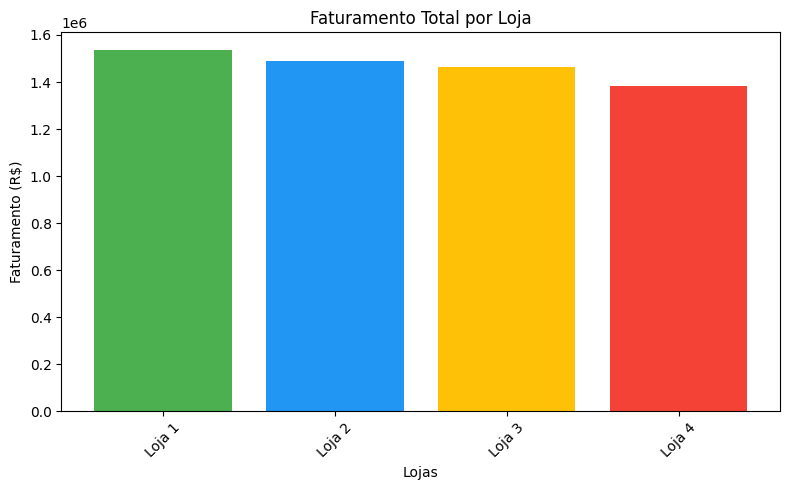

In [38]:
import matplotlib.pyplot as plt

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [1534509.12, 1488459.06, 1464025.03, 1384497.58]

plt.figure(figsize=(8,5))
plt.bar(lojas, faturamentos, color=['#4CAF50','#2196F3','#FFC107','#F44336'])
plt.title('Faturamento Total por Loja')
plt.ylabel('Faturamento (R$)')
plt.xlabel('Lojas')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

1464025.03

1384497.58

# 2. Vendas por Categoria


In [22]:
dicionario_categorias = loja.groupby('Categoria do Produto')['Quantidade de parcelas'].sum().to_dict()

print(dicionario_categorias)



{'brinquedos': 872, 'eletrodomesticos': 906, 'eletronicos': 1341, 'esporte e lazer': 796, 'instrumentos musicais': 573, 'livros': 520, 'moveis': 1446, 'utilidades domesticas': 489}


# 3. Média de Avaliação das Lojas

In [39]:
import statistics

media = statistics.mean(loja["Avaliação da compra"])
media2 = statistics.mean(loja2["Avaliação da compra"])
media3 = statistics.mean(loja3["Avaliação da compra"])
media4 = statistics.mean(loja4["Avaliação da compra"])
print(media, media2, media3, media4)

3.976685036032217 4.037303942348453 4.048325561678677 3.9957591178965224


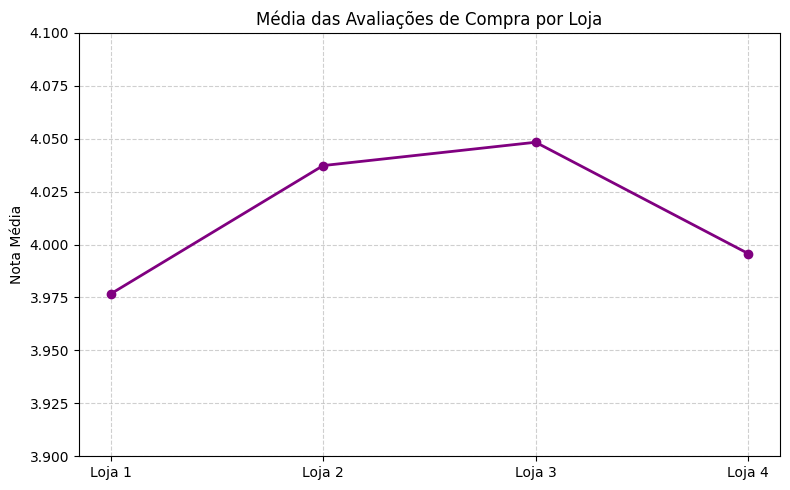

In [40]:
avaliacoes = [media, media2, media3, media4]

plt.figure(figsize=(8,5))
plt.plot(lojas, avaliacoes, marker='o', color='purple', linewidth=2)
plt.title('Média das Avaliações de Compra por Loja')
plt.ylabel('Nota Média')
plt.ylim(3.9, 4.1)  # Zoom para mostrar pequenas variações
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [30]:
dicionario_produtos= loja.groupby('Produto')['Quantidade de parcelas'].sum().to_dict()
dicionario_produtos2= loja2.groupby('Produto')['Quantidade de parcelas'].sum().to_dict()
dicionario_produtos3= loja3.groupby('Produto')['Quantidade de parcelas'].sum().to_dict()
dicionario_produtos4= loja4.groupby('Produto')['Quantidade de parcelas'].sum().to_dict()

maior_produto = max(dicionario_produtos, key=dicionario_produtos.get)
maior_produto2 = max(dicionario_produtos2, key=dicionario_produtos2.get)
maior_produto3 = max(dicionario_produtos3, key=dicionario_produtos3.get)
maior_produto4 = max(dicionario_produtos4, key=dicionario_produtos4.get)

print(maior_produto, dicionario_produtos[maior_produto])
print(maior_produto2, dicionario_produtos2[maior_produto2])
print(maior_produto3, dicionario_produtos3[maior_produto3])
print(maior_produto4, dicionario_produtos4[maior_produto4])


Secadora de roupas 214
Iniciando em programação 223
Bicicleta 191
Dashboards com Power BI 196


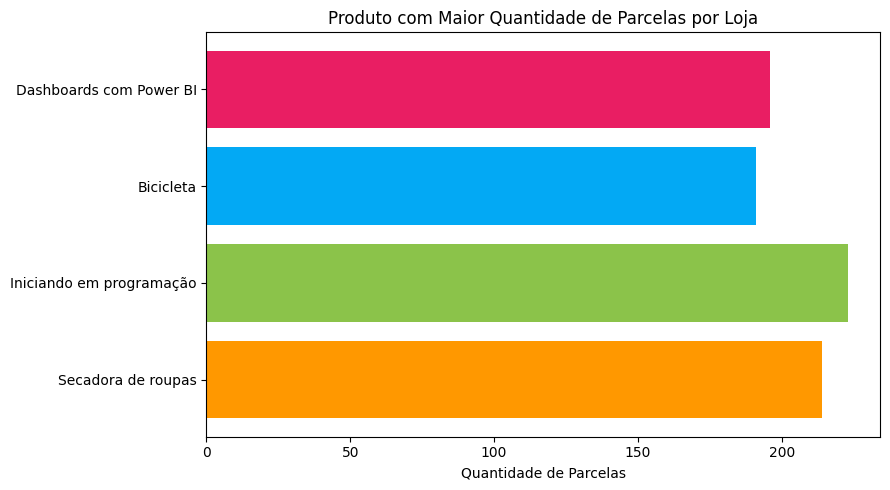

In [41]:
produtos = ['Secadora de roupas', 'Iniciando em programação', 'Bicicleta', 'Dashboards com Power BI']
parcelas = [214, 223, 191, 196]

# Gráfico de barras horizontais
plt.figure(figsize=(9,5))
plt.barh(produtos, parcelas, color=['#FF9800','#8BC34A','#03A9F4','#E91E63'])
plt.title('Produto com Maior Quantidade de Parcelas por Loja')
plt.xlabel('Quantidade de Parcelas')
plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


In [44]:
fret = statistics.mean(loja["Frete"])
fret2 = statistics.mean(loja2["Frete"])
fret3 = statistics.mean(loja3["Frete"])
fret4 = statistics.mean(loja4["Frete"])


34.69180491551149 33.62194065817927 33.074464274117425 31.27899708184173


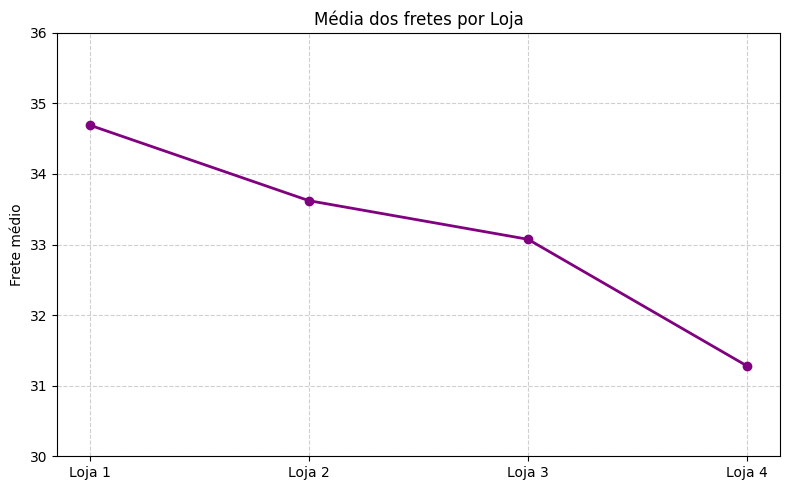

In [49]:
import matplotlib.pyplot as plt
import statistics

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

media = statistics.mean(loja["Frete"])
media2 = statistics.mean(loja2["Frete"])
media3 = statistics.mean(loja3["Frete"])
media4 = statistics.mean(loja4["Frete"])
print(media, media2, media3, media4)

frets = [media, media2, media3, media4]

plt.figure(figsize=(8,5))
plt.plot(lojas, frets, marker='o', color='purple', linewidth=2)
plt.title('Média dos fretes por Loja')
plt.ylabel('Frete médio')
plt.ylim(30, 36)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()